### Analysis of Yelp data result

In [1]:
import pickle
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline

In [2]:
!ls -alt *.pkl

-rw-r--r-- 1 1004 1004    60214 Feb 16 16:50 MNARyelp_log35.pkl
-rw-r--r-- 1 1004 1004    53960 Feb 14 16:52 MNARyelp_linear.pkl
-rw-r--r-- 1 1004 1004    53960 Feb 12 12:47 MARyelp_linear.pkl
-rw-rw-r-- 1 1004 1004    80160 Feb 11 09:27 Ymat.pkl
-rw-rw-r-- 1 1004 1004 41600163 Feb 11 09:27 Xsps.pkl
-rw-rw-r-- 1 1004 1004  2080162 Feb 11 09:27 Xmat.pkl
-rw-rw-r-- 1 1004 1004    60214 Feb 11 09:27 MARyelp_log35.pkl


In [3]:
#with open("./MARyelp_linear.pkl", "rb") as f:
with open("./MARyelp_log35.pkl", "rb") as f:
    MARres = pickle.load(f)
    
#with open("./MNARyelp_linear.pkl", "rb") as f:
with open("./MNARyelp_log35.pkl", "rb") as f:
    MNARres = pickle.load(f)

In [4]:
len(MNARres)

20

In [5]:
def AUCplot(MARres, MNARres, i, is_plot=False):
    marres,  mnarres = MARres[i], MNARres[i]
    marprobs, margts = marres[0].cpu().numpy(), marres[1].cpu().numpy()
    mnarprobs, mnargts = mnarres[0].cpu().numpy(), mnarres[1].cpu().numpy()
    marfpr, martpr, marthre = metrics.roc_curve(margts, marprobs)
    mnarfpr, mnartpr, mnarthre = metrics.roc_curve(mnargts, mnarprobs)
    marauc = metrics.roc_auc_score(margts, marprobs)
    mnarauc = metrics.roc_auc_score(mnargts, mnarprobs)
    if is_plot:
        plt.title("ROC curve")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.plot(marfpr, martpr, "--r", label="MAR")
        plt.plot(mnarfpr, mnartpr, label="MNAR")
        plt.legend()
    return marauc, mnarauc
    

In [6]:
allaucs = [AUCplot(MARres, MNARres, i)  for i in range(1, 21)] 

In [7]:
allaucs = np.array(allaucs)
allaucdf = pd.DataFrame(allaucs)
allaucdf.columns = ["MAR", "MNAR"]
allaucdf

,MAR,MNAR
0,0.662335,0.664595
1,0.743800,0.766600
2,0.646462,0.635112
3,0.688421,0.664689
4,0.749119,0.723984
5,0.663524,0.667789
6,0.715552,0.730025
7,0.691304,0.685375
8,0.600161,0.594942
9,0.656839,0.614286


In [8]:
MARprobs = []
MARgt = []
MNARprobs = []
MNARgt = []
for i in range(1, len(MNARres)+1):
    mnarres = MNARres[i]
    MNARprobs.append(mnarres[0].cpu().numpy())
    MNARgt.append(mnarres[1].cpu().numpy())
for i in range(1, len(MARres)+1):
    marres = MARres[i]
    MARprobs.append(marres[0].cpu().numpy())
    MARgt.append(marres[1].cpu().numpy())

In [9]:
MARgt = np.concatenate(MARgt)
MNARgt = np.concatenate(MNARgt)
MARprobs = np.concatenate(MARprobs)
MNARprobs = np.concatenate(MNARprobs)

In [10]:
Data = {
    "Probs": np.concatenate([MNARprobs, MARprobs]),
    "Method": ["MNAR"] * len(MNARprobs) + ["MAR"] * len(MARprobs),
    "GT": np.concatenate([MNARgt, MARgt])
}
dfdata = pd.DataFrame(Data)

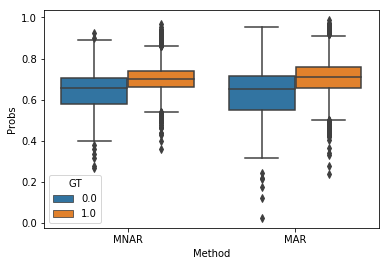

In [11]:
sns.boxplot(data=dfdata, x="Method", y="Probs", hue="GT")

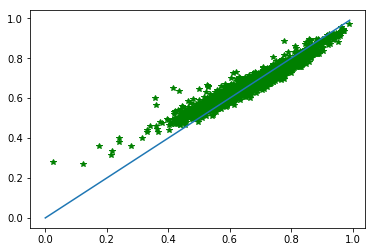

In [12]:
#plt.plot(MARgt[:200], "bo")
#plt.plot(MARgt[:200], MARprobs[:200], "rh")
#plt.plot(MARgt[:200], MNARprobs[:200], "g*")
plt.plot(MARprobs[:], MNARprobs[:], "g*")
plt.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01))

In [13]:
dfdatagrp = dfdata.groupby(["Method", "GT"])

In [14]:
dfdatagrp.describe()

Probs                                                    \
             count      mean       std       min       25%       50%   
Method GT                                                              
MAR    0.0   956.0  0.631640  0.111700  0.025142  0.551478  0.652062   
       1.0  2031.0  0.704073  0.095779  0.240222  0.655627  0.710458   
MNAR   0.0   956.0  0.642613  0.086361  0.267665  0.576892  0.657397   
       1.0  2031.0  0.697058  0.077871  0.360262  0.660333  0.698396   

                                
                 75%       max  
Method GT                       
MAR    0.0  0.714221  0.953735  
       1.0  0.759943  0.986519  
MNAR   0.0  0.705805  0.925170  
       1.0  0.740506  0.969205

In [15]:
from sklearn import metrics

In [16]:
metrics.roc_auc_score(MARgt, MARprobs)

0.6867456104027738

In [17]:
metrics.roc_auc_score(MNARgt, MNARprobs)

0.6779478748848909

In [18]:
marfpr, martpr, marthre = metrics.roc_curve(MARgt, MARprobs)
mnarfpr, mnartpr, mnarthre = metrics.roc_curve(MNARgt, MNARprobs)

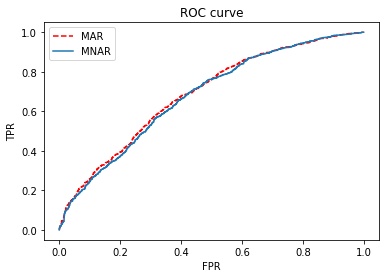

In [19]:
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(marfpr, martpr, "--r", label="MAR")
plt.plot(mnarfpr, mnartpr, label="MNAR")
plt.legend()

In [21]:
with open("Ymat.pkl", "rb") as f:
    Y = pickle.load(f)

In [23]:
Yno = Y[Y!=-1]

(array([  52.,    0.,  220.,    0.,    0.,  684.,    0., 1227.,    0.,
         804.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

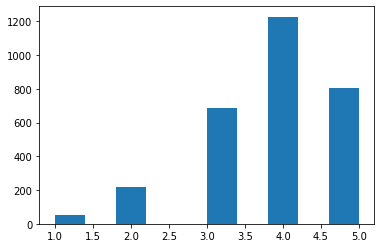

In [26]:
plt.hist(Yno)

In [5]:
((MARgt -MARprobs)**2).mean()

1.289665114701737

In [6]:
((MNARgt - MNARprobs)**2).mean()

1.4290432255336734

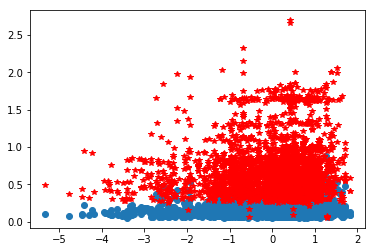

In [13]:
plt.plot(MARgt, logit(MARprobs), "o")
plt.plot(MNARgt, logit(MNARprobs), "*r")

In [10]:
from scipy.special import logit

In [11]:
((MARgt -logit(MARprobs))**2).mean()

1.0178259816475603

In [12]:
((MNARgt -logit(MNARprobs))**2).mean()

1.5366011468047311

In [14]:
MARprobs.min()

0.5134745364385195